In [16]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import * 
import sklearn  
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # 设置seed，使结果一致

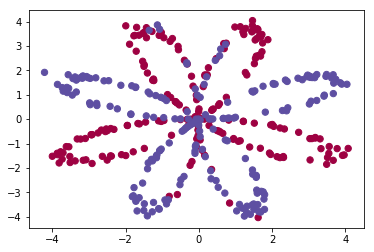

In [17]:
 #加载一个“花” 2级的数据集中到变量X和Y,并可视化数据
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic回归的准确性：47 % （正确标记的数据点的百分比）


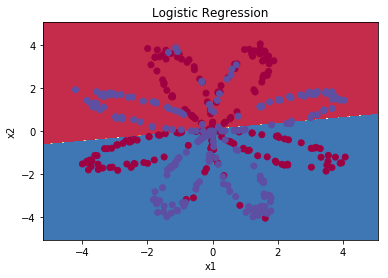

In [18]:
# 采用sklearn中的logistic回归模型进行分类
clf = sklearn.linear_model.LogisticRegressionCV(); # 初始化分类器
clf.fit(X.T, Y.T);  # 数据拟合

# 绘制逻辑回归的决策边界
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print ('logistic回归的准确性：%d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "（正确标记的数据点的百分比）")

In [19]:
# 分级功能，获得每一层的节点数
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [20]:
# 初始化模型的参数
def initialize_parameters(n_x, n_h, n_y):
    """
        W1 -- weight matrix of shape (n_h, n_x) - 形状的权重矩阵
        b1 -- bias vector of shape (n_h, 1) - 形状的偏向量
        W2 -- weight matrix of shape (n_y, n_h)  - 形状权重矩阵
        b2 -- bias vector of shape (n_y, 1) - 形状的偏向量
    """
    np.random.seed(2)
    # 在神经网络中，通常将参数w进行随机初始化，参数b则初始化为0。
    W1 = np.random.randn(n_h,n_x) * 0.01 #随机初始化
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01 #随机初始化
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [21]:
# 前向传播
def forward_propagation(X, parameters):
    """
    论据:
    X -- 输入数据大小 (n_x, m)
    parameters -- 包含你的参数的python字典 (初始化函数的输出)
    
    返回:
    A2 -- The sigmoid output of the second activation 第二次激活的s的输出
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # 从字典“参数”中检索每个参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # 实现正向传播来计算A2（概论）
    Z1 = np.dot(W1, X)+b1
    A1 = np.tanh(Z1) 
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [22]:
#计算成本函数
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    
    cost = -np.sum(np.multiply(Y,np.log(A2)) + np.multiply((1-Y),np.log(1-A2)))/m
    cost = np.squeeze(cost)
    
    return cost

In [23]:
# 反向传播
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # 从字典“parameters”中检索W1和W2
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # 从字典“cache”中检索W1和W2
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # 反向传播：计算dW1, db1, dW2, db2
    dZ2 = A2 -Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1,2)) # g'(x) = 1-(g(x))^2
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    grads = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}
    
    return grads

In [24]:
# 更新参数
def update_parameters(parameters, grads, learning_rate = 1.2):
    # 从字典“parameters”中检索W1和W2
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # 从字典中检索每个渐变“grads”
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # 更新每个参数的规则
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
     
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [25]:
# 建立神经网络模型
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # 初始化参数，输入n_x, n_h, n_y，输出W1, b1, W2, b2，参数
    parameters = initialize_parameters(n_x, n_h, n_y);
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        # 前向传播
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print("循环%i次后的成本: %f" %(i, cost))

    return parameters

In [26]:
# 预测结果
def predict(parameters, X):
    # 使用正向传播计算概论，并使用0.5作为阈值分类为0/1
    A2, cache= forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

循环0次后的成本: 0.693048
循环1000次后的成本: 0.288083
循环2000次后的成本: 0.254385
循环3000次后的成本: 0.233864
循环4000次后的成本: 0.226792
循环5000次后的成本: 0.222644
循环6000次后的成本: 0.219731
循环7000次后的成本: 0.217504
循环8000次后的成本: 0.219528
循环9000次后的成本: 0.218627
准确度: 90%


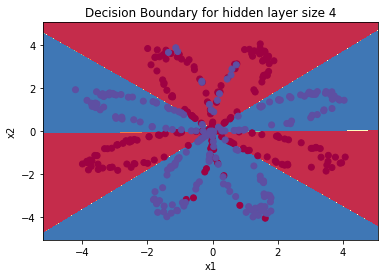

In [27]:
# 将数据输入神经网络模型
# 建立一个n_h维隐藏层的模型
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# 绘制决策边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# 打印精度
predictions = predict(parameters, X)
print ('准确度: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%') #打印精确度

节点数为1时的分类准确度为 : 67.5 %
节点数为2时的分类准确度为 : 67.25 %
节点数为3时的分类准确度为 : 90.75 %
节点数为4时的分类准确度为 : 90.5 %
节点数为5时的分类准确度为 : 91.25 %
节点数为20时的分类准确度为 : 90.5 %
节点数为50时的分类准确度为 : 90.25 %
节点数为100时的分类准确度为 : 91.0 %


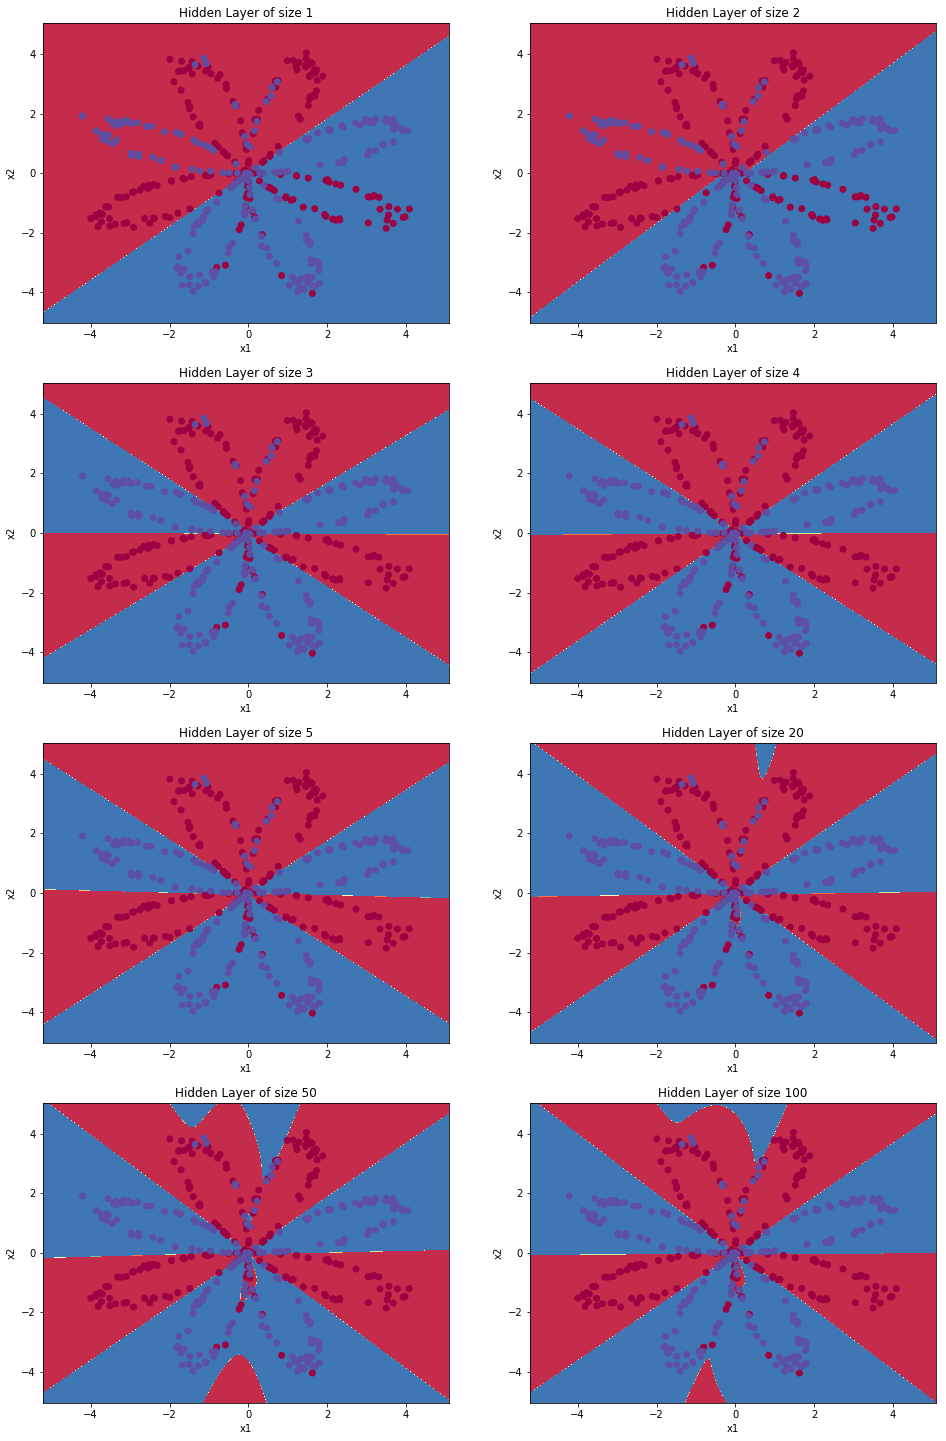

In [29]:
# 不同隐藏层节点数下分类效果
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("节点数为{}时的分类准确度为 : {} %".format(n_h, accuracy))